<a href="https://colab.research.google.com/github/KhotNoorin/Deep-Learning/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks (CNN)


A Convolutional Neural Network (CNN) is a type of deep neural network primarily used for analyzing **visual imagery**. CNNs are highly effective for image classification, object detection, and computer vision tasks due to their ability to automatically and adaptively learn spatial hierarchies of features from input images.

---

## Key Concepts in CNN

### 1. Convolutional Layer
- Applies a **filter/kernel** to the input image.
- Performs a **convolution operation** that extracts local features like edges, textures, etc.
- The result is a **feature map**.
- Parameters:
  - Filter size (e.g., 3x3)
  - Stride (how much the filter moves)
  - Padding (same or valid)

### 2. Activation Function (ReLU)
- Introduces **non-linearity** to the network.
- Commonly used: **ReLU (Rectified Linear Unit)**: `f(x) = max(0, x)`

### 3. Pooling Layer
- Reduces the spatial size of feature maps.
- Helps in **dimensionality reduction** and **controls overfitting**.
- Common types:
  - Max Pooling: takes the maximum value.
  - Average Pooling: takes the average value.

### 4. Fully Connected Layer
- After convolution and pooling, the high-level reasoning is done via **fully connected layers** (dense layers).
- Each neuron is connected to all neurons in the previous layer.

---

## Architecture of a Simple CNN

1. Input Image
2. Convolutional Layer + ReLU
3. Pooling Layer
4. (Repeat Conv + Pooling layers)
5. Flatten
6. Fully Connected Layer
7. Output Layer (Softmax for classification)

---

## Advantages of CNN

- **Parameter sharing**: Same filter applied across the input.
- **Sparse connectivity**: Only a portion of the image is processed at a time.
- **Translation invariance**: Ability to detect features regardless of location.

---

## Applications of CNN

- Image Classification
- Object Detection
- Face Recognition
- Medical Image Analysis
- Video Analysis
- Self-driving Cars

---

## Common CNN Architectures

- LeNet-5 (early CNN)
- AlexNet
- VGGNet
- GoogLeNet (Inception)
- ResNet (Residual Networks)
- EfficientNet

---

## Summary

CNNs are a cornerstone of modern deep learning for visual data. They leverage local connectivity and feature reuse to achieve high accuracy in a variety of image-related tasks. Understanding CNN architecture and components is fundamental to working with computer vision problems in deep learning.


# Convolution step — like how a filter slides over the image

In [1]:
import numpy as np

In [2]:
# A tiny 5x5 grayscale image
image = np.array([
    [10, 10, 10, 10, 10],
    [10, 50, 50, 50, 10],
    [10, 50,100, 50, 10],
    [10, 50, 50, 50, 10],
    [10, 10, 10, 10, 10]
])

In [3]:
# A simple 3x3 edge detection filter (Laplacian)
kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

In [4]:
# Output image (will be 3x3 if we do valid convolution)
output = np.zeros((3, 3))

In [5]:
# Perform convolution
for i in range(3):        # image height - kernel height + 1
    for j in range(3):    # image width - kernel width + 1
        region = image[i:i+3, j:j+3]        # 3x3 region from image
        conv_result = np.sum(region * kernel)
        output[i, j] = conv_result          # assign result to output

In [6]:
print("Input Image:\n", image)

Input Image:
 [[ 10  10  10  10  10]
 [ 10  50  50  50  10]
 [ 10  50 100  50  10]
 [ 10  50  50  50  10]
 [ 10  10  10  10  10]]


In [8]:
print("Kernel (Filter):\n", kernel)

Kernel (Filter):
 [[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


In [9]:
print("Convolved Output:\n", output)

Convolved Output:
 [[ 80. -10.  80.]
 [-10. 200. -10.]
 [ 80. -10.  80.]]


# RGB image

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import urllib.request

In [13]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/PNG_transparency_demonstration_1.png/320px-PNG_transparency_demonstration_1.png'
resp = urllib.request.urlopen(url)
image_data = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image_data, cv2.IMREAD_COLOR)

In [14]:
# Convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [15]:
# Define edge detection kernel
kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

In [16]:
# Convolution function
def convolve_rgb(image, kernel):
    h, w, c = image.shape
    kh, kw = kernel.shape
    pad = kh // 2

    # Pad all channels
    padded = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values=0)
    output = np.zeros_like(image)

    # Apply filter to each channel
    for ch in range(3):  # R, G, B
        for i in range(h):
            for j in range(w):
                region = padded[i:i+kh, j:j+kw, ch]
                value = np.sum(region * kernel)
                output[i, j, ch] = np.clip(value, 0, 255)
    return output

In [17]:
# Apply convolution
convolved_img = convolve_rgb(img, kernel)

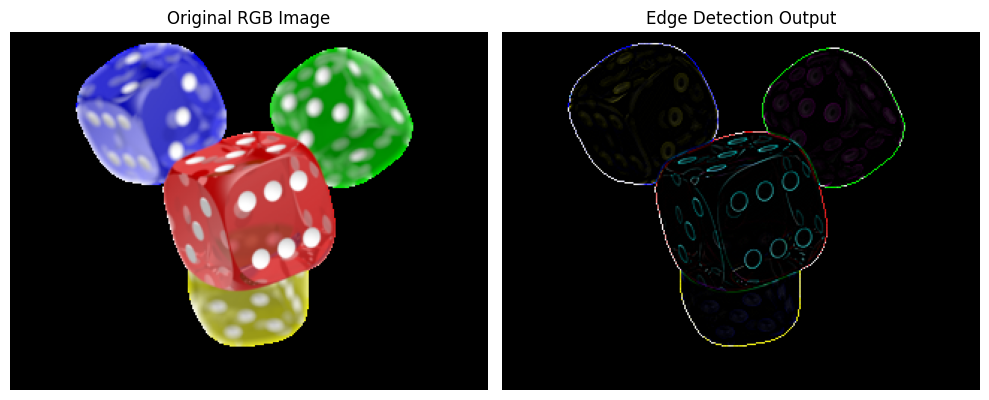

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original RGB Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Edge Detection Output")
plt.imshow(convolved_img)
plt.axis('off')

plt.tight_layout()
plt.show()

# Padding

In [9]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten
from keras import Sequential
from keras.datasets import mnist

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,002,698 (7.64 MB)

 Trainable params: 2,002,698 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,231,498 (12.33 MB)

 Trainable params: 3,231,498 (12.33 MB)

 Non-trainable params: 0 (0.00 B)

# Strides:

# without strides

In [15]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,231,498 (12.33 MB)

 Trainable params: 3,231,498 (12.33 MB)

 Non-trainable params: 0 (0.00 B)

# with strides

In [17]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,770 (335.04 KB)

 Trainable params: 85,770 (335.04 KB)

 Non-trainable params: 0 (0.00 B)

# Pooling Layer in CNN:

In [1]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras import Sequential
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

How pooling enhance feature :

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import urllib.request

In [14]:
url = 'https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png'
resp = urllib.request.urlopen(url)
img_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [15]:
# Resize to manageable size
img = cv2.resize(img, (600, 400))

In [16]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [17]:
# Apply edge detection (Sobel filter)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
edges = np.sqrt(sobelx**2 + sobely**2)
edges = np.clip(edges, 0, 255).astype(np.uint8)

In [18]:
def max_pooling(image, pool_size=2):
    h, w = image.shape
    new_h, new_w = h // pool_size, w // pool_size
    pooled = np.zeros((new_h, new_w), dtype=np.uint8)

    for i in range(0, h - pool_size + 1, pool_size):
        for j in range(0, w - pool_size + 1, pool_size):
            region = image[i:i+pool_size, j:j+pool_size]
            pooled[i//pool_size, j//pool_size] = np.max(region)

    return pooled

In [19]:
pooled_edges = max_pooling(edges)

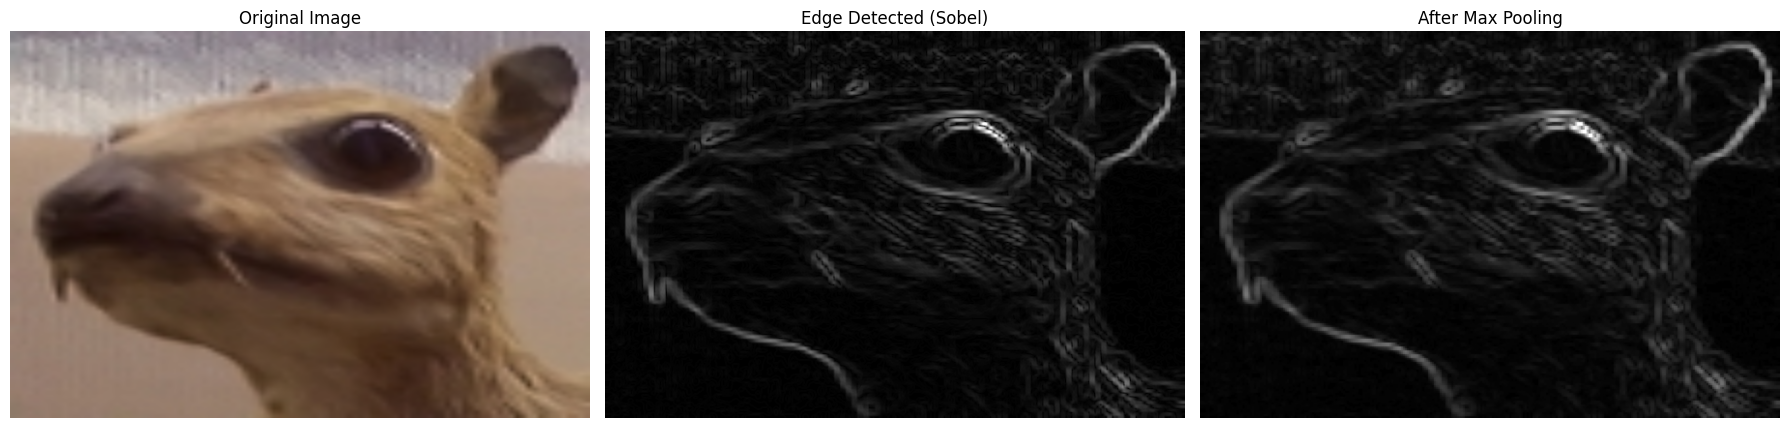

In [20]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Edge Detected (Sobel)")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("After Max Pooling")
plt.imshow(pooled_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

| Feature           | CNN from Scratch                | CNN with Keras                |
| ----------------- | ------------------------------- | ----------------------------- |
| **Ease of Use**   |  Manual coding of conv/pooling |  High-level API              |
| **Speed**         |  Very slow                    |  Fast with GPU support      |
| **Customization** |  Full control                  |  Limited unless subclassing |
| **Accuracy**      | Low (random weights used)       | High (learned weights)        |
| **Good For**      | Learning internals              | Real-world applications       |


# CNN FROM SCRATCH

In [32]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [33]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:1000] / 255.0  # Limit for speed
x_test = x_test[:200] / 255.0
y_train = to_categorical(y_train[:1000], 10)
y_test = to_categorical(y_test[:200], 10)

In [34]:
# Initialize filters
filter_size = 3
num_filters = 8

In [35]:
def relu(x):
    return np.maximum(0, x)

In [36]:
def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps, axis=-1, keepdims=True)

In [37]:
def conv2d(X, filt):
    h, w = X.shape
    f = filt.shape[0]
    out = np.zeros((h - f + 1, w - f + 1))
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            out[i, j] = np.sum(X[i:i+f, j:j+f] * filt)
    return out

In [38]:
def maxpool(X, size=2, stride=2):
    h, w = X.shape
    out_h = (h - size) // stride + 1
    out_w = (w - size) // stride + 1
    output = np.zeros((out_h, out_w))
    for i in range(out_h):
        for j in range(out_w):
            output[i, j] = np.max(X[i*stride:i*stride+size, j*stride:j*stride+size])
    return output

In [39]:
# One sample forward
np.random.seed(1)
filters = np.random.randn(num_filters, filter_size, filter_size)

def forward(img):
    conv_out = np.array([conv2d(img, f) for f in filters])
    relu_out = relu(conv_out)
    pooled_out = np.array([maxpool(fm) for fm in relu_out])
    flatten = pooled_out.flatten()
    fc = np.dot(flatten, np.random.randn(flatten.shape[0], 10))  # Random FC
    return softmax(fc)

In [40]:
pred = forward(x_test[0])

In [41]:
print("Predicted:", np.argmax(pred))

Predicted: 4


In [42]:
print("True label:", np.argmax(y_test[0]))

True label: 7


# CNN USING KERAS

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [44]:
# Preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:1000].reshape(-1, 28, 28, 1) / 255.0
x_test = x_test[:200].reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train[:1000], 10)
y_test = to_categorical(y_test[:200], 10)


In [45]:
# Build model
model = Sequential([
    Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [46]:
# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.2777 - loss: 2.1765 - val_accuracy: 0.7400 - val_loss: 1.5657
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7753 - loss: 1.2892 - val_accuracy: 0.8000 - val_loss: 0.9034
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8382 - loss: 0.7343 - val_accuracy: 0.8100 - val_loss: 0.6256
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8671 - loss: 0.5068 - val_accuracy: 0.8450 - val_loss: 0.5013
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8974 - loss: 0.4078 - val_accuracy: 0.8850 - val_loss: 0.4194


In [47]:
# Evaluate
loss, acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8885 - loss: 0.4122 
Test Accuracy: 0.8849999904632568


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


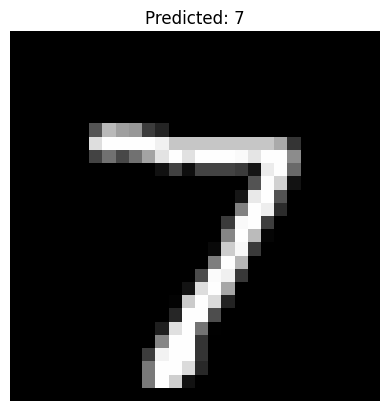

In [48]:
# Show input and prediction for Keras model
import matplotlib.pyplot as plt

plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(model.predict(x_test[:1]))}")
plt.axis('off')
plt.show()